#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()


In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

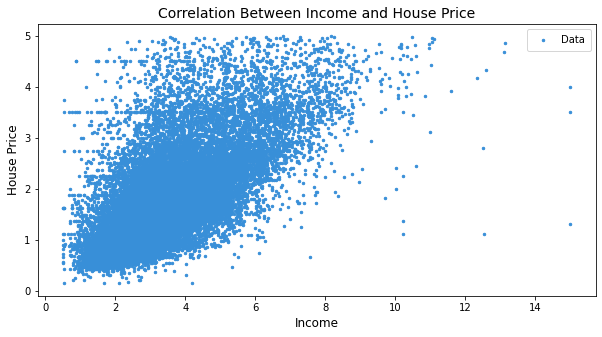

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
    # Stochastic Gradient Descent has batch_size of 1 always. Reference: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=When%20the%20batch%20is%20the,called%20mini%2Dbatch%20gradient%20descent.
    m=0.1
    b=00.1
    mse = []
    for i in range(epochs):
        ind = np.random.randint(0,len(X))
        X = np.asarray(X)
        y = np.asarray(y)
        Xsel = X[ind]
        ysel = y[ind]
        N = batch_size
        err = ysel - (m*Xsel + b)
        # Updating parameters m and b
        m = m - lr * (-2 * np.sum(np.dot(Xsel,err)) / N)
        b = b - lr * (-2 * np.sum(err) / N)
        mse.append(np.mean(abs(y-(m*X+b))**2))        
        
    return m, b, mse

In [0]:
epochs=100
m, b,  mse = SGD(X, y, lr=0.01, epochs=epochs, batch_size=2)
print(m)
print(b)

0.5231351601225006
0.1832201534765274


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

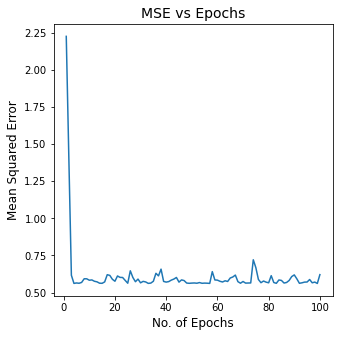

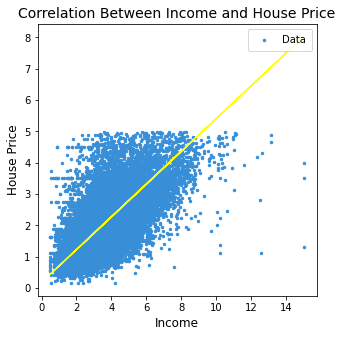

In [0]:
y_pred = m*X + b
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,epochs+1),mse)
plt.title('MSE vs Epochs', fontSize=14)
plt.ylabel('Mean Squared Error', fontSize=12)
plt.xlabel('No. of Epochs', fontSize=12)


plt.figure(figsize=(5,5))
plt.plot(X,y_pred,c='yellow')
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)


#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



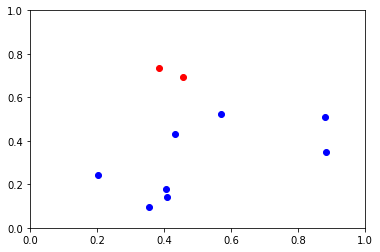

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    w = np.zeros(x.shape[1]+1)
    x = np.append(np.ones(shape=(len(x),1)),x,axis=1)
    for t in range(1,epoch+1):
        it = np.random.randint(0,len(x))
        nt = 1/(l_rate*t)
        if (y[it] * np.dot(w, x[it])) < 1:
            w = (1-(l_rate*nt)) * w + nt * y[it] * x[it]
        else:
            w = (1-(l_rate*nt)) * w
    return w



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 0.00001)
print(w)

[-10.          -5.99840905  20.21256404]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



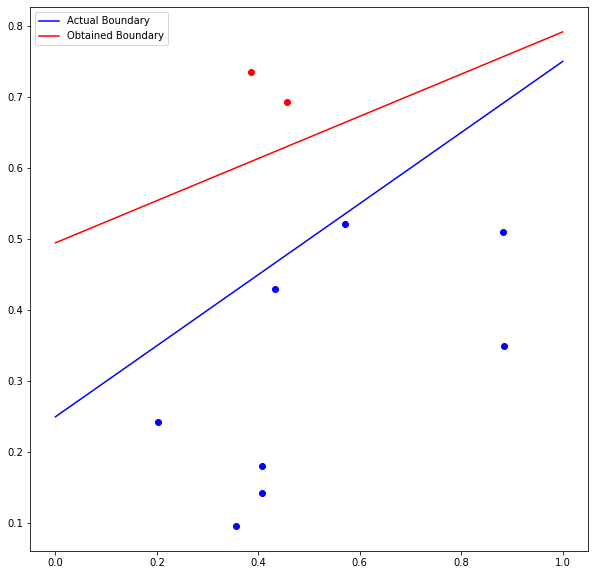

In [0]:
plt.figure(figsize=(10,10))
for x, y, l in data:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)

x = np.array([0,1])
act_y = 0.5*x + 0.25
obt_y = -x*w[1]/w[2] - w[0]/w[2]
plt.plot(x,act_y,'b')
plt.plot(x,obt_y,'r')
plt.legend(['Actual Boundary','Obtained Boundary'],loc='best')
plt.show()